 # Homework 11 Verification
 ### ATSC 507
 ##### Christopher Rodell

In [1]:
import context
import numpy as np 
import matplotlib.pyplot as plt
from cr507.utils import plt_set

******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/db80a11e-bab7-49cc-9d77-77971a564f4e
******************************

through /Users/rodell/atsc507/py/hw11/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


 A19. Given the following fields of 50-kPa height <br />
 (km). Find the: <br />
 <br />
 Each field (i.e., each weather map) below covers an
 area from North to South and West to East.

In [2]:
d   =  {"A" :np.array([[5.2, 5.3, 5.4, 5.3], [5.3, 5.4, 5.5, 5.4], [5.4, 5.5, 5.6, 5.5], [5.5, 5.6, 5.7, 5.6], [5.6, 5.7, 5.8, 5.7]]),
        "F": np.array([[5.3, 5.4, 5.5, 5.4],[5.5, 5.4, 5.5, 5.6],[5.6, 5.6, 5.6, 5.6],[5.8, 5.7, 5.6, 5.7],[5.9, 5.8, 5.7, 5.8]]),
        "V": np.array([[5.3, 5.3, 5.3, 5.4],[5.4, 5.3, 5.4, 5.5],[5.5, 5.4, 5.5, 5.5],[5.7, 5.5, 5.6, 5.6],[5.8, 5.7, 5.6, 5.6]]),
        "C": np.array([[5.4, 5.4, 5.4, 5.4],[5.4, 5.4, 5.4, 5.4],[5.5, 5.5, 5.5, 5.5],[5.6, 5.6, 5.6, 5.6],[5.7, 5.7, 5.7, 5.7]])}


 a. mean forecast error <br />
 $$
 M E=\overline{(F-V)}=\bar{F}-\bar{V}
 $$

In [3]:

ME = np.mean(d['F']- d['V'])
print(f"Mean Forecast Error: {round(ME,4)} km")


Mean Forecast Error: 0.105 km


 b. mean persistence error <br />
 $$
 \overline{(A-V)}=\bar{A}-\bar{V}=\text { mean persistence error }
 $$

In [4]:

MPE = np.mean(d['A']- d['V'])
print(f"Mean Persistence Error: {round(MPE,4)} km")



Mean Persistence Error: 0.005 km


 c. mean absolute forecast error <br />
 $$
 M A E=\overline{|F-V|}
 $$

In [5]:

MAE = np.mean(abs(d['F']- d['V']))
print(f"Mean Absolute Forecast Error: {round(MAE,4)} km")



Mean Absolute Forecast Error: 0.105 km


 d. mean squared forecast error <br />
 $$
 M S E=\overline{(F-V)^{2}}
 $$

In [6]:

MSE = np.mean((d['F']- d['V'])**2)
print(f"Mean Squared Forecast Error:{round(MSE,4)} km^2")



Mean Squared Forecast Error:0.0145 km^2


 e. mean squared climatology error <br />
 $$
 M S E C=\overline{(C-V)^{2}}
 $$

In [7]:

MSEC = np.mean((d['C']- d['V'])**2)
print(f"Mean Squared Climatology Error: {round(MSEC,4)} km^2")


Mean Squared Climatology Error: 0.0055 km^2


 f. mean squared forecast error skill score <br />
 $$
 \operatorname{MSESS}=1-\frac{\operatorname{MSE}}{\operatorname{MSEC}}
 $$

In [8]:

MSESS = 1 - (MSE/ MSEC)
print(f"Mean Squared Forecast Error Skill Score: {round(MSESS,4)}  ")


Mean Squared Forecast Error Skill Score: -1.6364  


 g. RMS forecast error <br />
 $$
 R M S E=\sqrt{\overline{(F-V)^{2}}}
 $$

In [9]:

RMS = np.mean((d['F']- d['V'])**2)**(0.5)
print(f"RMS Forecast Error: {round(RMS,4)} km")



RMS Forecast Error: 0.1204 km


 h. correlation coefficient between forecast and verification <br />
 $$
 r=\frac{\overline{F^{\prime} V^{\prime}}}{\sqrt{\overline{(F^{\prime})^{2}}} \cdot \sqrt{\overline{(V^{\prime})^{2}}}}
 $$
 $$
 F^{\prime}=F-\bar{F} \quad \text { and } \quad V^{\prime}=V-\bar{V}
 $$

In [10]:
FP = d['F'] - np.mean(d['F'])
d.update({'FP':FP})
VP = d['V'] - np.mean(d['V'])
d.update({'VP':VP})

r = np.mean(d['FP'] * d['VP']) / \
    (((np.mean(d['FP']**(2)))**(0.5)) * ((np.mean(d['VP']**(2)))**(0.5)))
print("Correlation Coefficient between Forecast and Verification:  ", round(r,4))


Correlation Coefficient between Forecast and Verification:   0.9248


 i. forecast anomaly correlation <br />
 $$
 \text{forecast anomaly correlation} = \frac{\overline{[(F-C)-\overline{(F-C)}] \cdot[(V-C)-\overline{(V-C)}]}}{\sqrt{[\overline{(F-C)-\overline{(F-C)}]^{2}} \cdot \overline{[(V-C)-\overline{(V-C)}]^{2}}}}
 $$

In [11]:

k1 = np.mean(((d['F']-d['C']) - np.mean(d['F']-d['C'])) * \
        ((d['V']-d['C']) - np.mean(d['V']-d['C']))) 

k2 = (np.mean((((d['F']-d['C']) - np.mean(d['F']-d['C']))**2)) * \
        np.mean(((d['V']-d['C']) - np.mean(d['V']-d['C']))**2))**(0.5)
FAC = k1/k2

print("Forecast Anomaly Correlation:  ", round(FAC,4))


Forecast Anomaly Correlation:   0.6699


 j. persistence anomaly correlation <br />
 $$
 \text{persistence anomaly correlation} = \frac{\overline{[(A-C)-\overline{(A-C)}] \cdot[(V-C)-\overline{(V-C)}]}}{\sqrt{[\overline{(A-C)-\overline{(A-C)}]^{2}} \cdot \overline{[(V-C)-\overline{(V-C)}]^{2}}}}
 $$

In [12]:

k1 = np.mean(((d['A']-d['C']) - np.mean(d['A']-d['C'])) * \
        ((d['V']-d['C']) - np.mean(d['V']-d['C']))) 
        
k2 = (np.mean((((d['A']-d['C']) - np.mean(d['A']-d['C']))**2)) * \
        np.mean(((d['V']-d['C']) - np.mean(d['V']-d['C']))**2))**(0.5)

PAC = k1/k2

print("Persistence Anomaly Correlation:  ", round(PAC,4))




Persistence Anomaly Correlation:   -0.0881


 k. Draw height contours by hand for each field, to show locations of ridges and troughs. <br />
 <br />

 <img src="fig1.png">



 <img src="fig2.png">

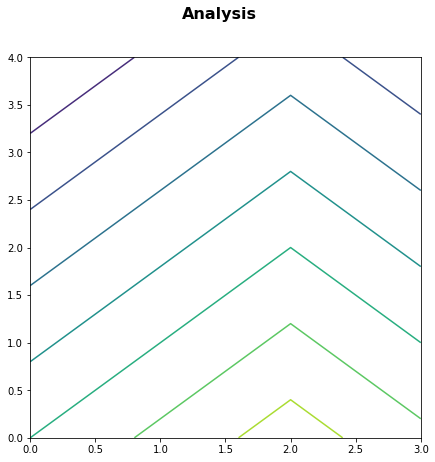

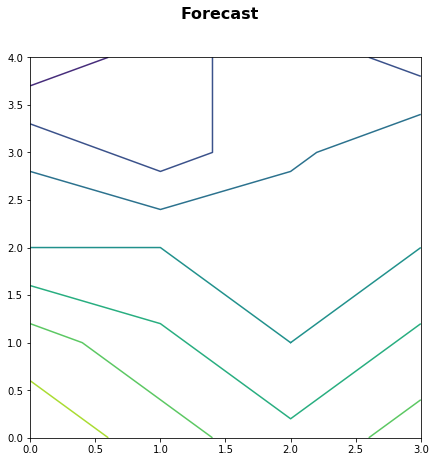

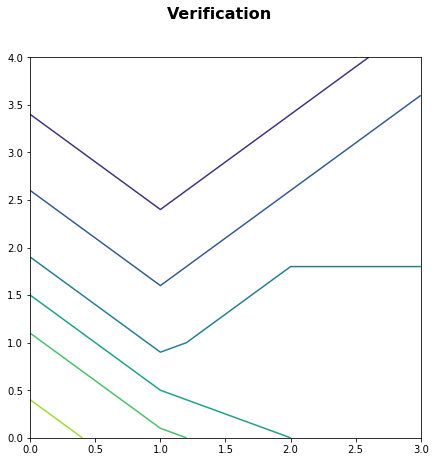

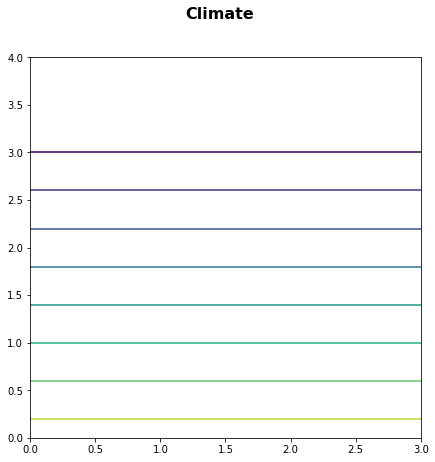

In [13]:

fig, ax = plt.subplots(figsize=(7,7))
fig.suptitle('Analysis', fontsize= plt_set.title_size, fontweight="bold")
level = np.mean(d['A'])
ax.contour(np.flip(d['A'],0))

fig, ax = plt.subplots(figsize=(7,7))
fig.suptitle('Forecast', fontsize= plt_set.title_size, fontweight="bold")
level = np.mean(d['F'])
ax.contour(np.flip(d['F'],0))

fig, ax = plt.subplots(figsize=(7,7))
fig.suptitle('Verification', fontsize= plt_set.title_size, fontweight="bold")
level = np.mean(d['V'])
ax.contour(np.flip(d['V'],0))

fig, ax = plt.subplots(figsize=(7,7))
fig.suptitle('Climate', fontsize= plt_set.title_size, fontweight="bold")
level = np.mean(d['C'])
ax.contour(np.flip(d['C'],0))

# plt.show()



 A20. Given the following contingency table, calculate all the binary verification statistics. <br />
  <br />
 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Observation <br />
 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Yes No <br />
 Forecast Yes: 150 65 <br />
 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; No: 50 100<br />

In [14]:
a, b, c ,d = 150, 65, 50, 100
# Find: B, PC, HSS, H, F, FAR, TSS, CSI, GSS

 $$
 n=a+b+c+d
 $$

In [15]:
n = a + b + c + d
print(n)


365


 $$
 B=\frac{a+b}{a+c}
 $$

In [16]:
B = (a + b) / (a + c)
print("bias score", B)


bias score 1.075


 $$
 P C=\frac{a+d}{n}
 $$

In [17]:

PC = (a + d) / n
print ("portion correct", PC)


portion correct 0.684931506849315


 $$
 E=\left(\frac{a+b}{n}\right) \cdot\left(\frac{a+c}{n}\right)+\left(\frac{d+b}{n}\right) \cdot\left(\frac{d+c}{n}\right)
 $$

In [18]:

E = (((a + b)/ n) * ((a + c)/ n)) + (((d + b)/ n) * ((d + c)/ n))

print("“random luck” part of PC", E)


“random luck” part of PC 0.5085381872771627


 $$
 H S S=\frac{P C-E}{1-E}
 $$

In [19]:

HSS = (PC - E)/ (1 - E)
print(" Heidke skill score", HSS)


Heidke skill score 0.3589156166475753


 $$
 H=\frac{a}{a+c}
 $$

In [20]:

H = a / (a + c)

print("Hit rate",H)


Hit rate 0.75


 $$
 F=\frac{b}{b+d}
 $$

In [21]:
F = b / (b + d)
print ("false-alarm rate", F)


false-alarm rate 0.3939393939393939


 $$
 F A R=\frac{b}{a+b}
 $$

In [22]:

FAR = b / (a +b)
print("false-alarm ratio", FAR)


false-alarm ratio 0.3023255813953488


 $$
 T S S=H-F
 $$

In [23]:
TSS = H - F
print("true skill score", TSS)


true skill score 0.3560606060606061


 $$
 C S I=\frac{a}{a+b+c}
 $$

In [24]:

CSI = a / (a + b +c)
print("critical success index", CSI)



critical success index 0.5660377358490566


 $$
 a_{r}=\frac{(a+b) \cdot(a+c)}{n}
 $$

In [25]:
ar = ((a + b) * (a + c))/ n
print("Hits that might have occurred by random chance", ar)


Hits that might have occurred by random chance 117.8082191780822


 $$
 G S S=\frac{a-a_{r}}{a-a_{r}+b+c}
 $$

In [26]:

GSS = (a - ar)/ (a - ar + b + c)
print("Gilbert’s skill score", GSS)


Gilbert’s skill score 0.21870637505816656


 A21. Given forecasts having the contingency table
 of exercise N20. Protective cost is 5k dollars to avoid a loss
 of 50k dollars. Climatological frequency of the event is
 50%.

 - a) Find the value of the forecast.

 $$
 E_{\text {climate}}=\min (C, o \cdot L)
 $$

In [27]:
C, L, o = 5, 50, 0.5

if C < (L*o):
        E_climate = C
        print(f'E_climate {E_climate}k dollars')
else:
        E_climate = L*o
        print(f"E_climate {E_climate}K dollars")


E_climate 5k dollars


 $$
 E_{\text {forecast}}=\frac{a}{n} C+\frac{b}{n} C+\frac{c}{n} L
 $$

In [28]:

E_forecast = (a/n)*C + (b/n)*C + (c/n)*L 
print(f"E_forecast {round(E_forecast,3)}k dollars")


E_forecast 9.795k dollars


 $$
 E_{p e r f e c t}=o \cdot C
 $$

In [29]:
E_perfect = o*C 
print(f"E_perfect {round(E_perfect,3)}k dollars")


E_perfect 2.5k dollars


 $$
 V=\frac{E_{\text {climate}}-E_{\text {forecast}}}{E_{\text {climate}}-E_{\text {perfect}}}
 $$

In [30]:

V = (E_climate - E_forecast)/ (E_climate - E_perfect)
print(f"Economic value {round(V,3)}")


Economic value -1.918


  - a) cont.
 **The economic value is negative which, indicates your forecast is worst than the climatology.... Time to rethink your job.**

 $$
 r_{C L}=C / L
 $$

In [31]:
r_cl = C/L
print(f"cost/loss ratio {r_cl}")


cost/loss ratio 0.1


 - (b) If you
 can get probabilistic forecasts, then what probability
 would you want in order to decide to take protective
 action? <br />
  <br />
 **You should take protective action whenever the forecast probability
 p of the event exceeds your cost/loss ratio. In this case. Where
 p > 0.1**

 A22. Given the table below of k = 1 to 20 forecasts
 of probability pk that 24-h accumulated precipitation
 will be above 25 mm, and the verification ok = 1 if the
 observed precipitation was indeed above this threshold.
 $$
 \begin{array}{llllll}k & p_{k} & o_{k} & k & p_{k} & o_{k} \\ 1 & 0.9 & 1 & 11 & 0.4 & 0 \\ 2 & 0.85 & 1 & 12 & 0.35 & 0 \\ 3 & 0.8 & 0 & 13 & 0.3 & 1 \\ 4 & 0.75 & 1 & 14 & 0.25 & 0 \\ 5 & 0.7 & 1 & 15 & 0.2 & 0 \\ 6 & 0.65 & 1 & 16 & 0.15 & 1 \\ 7 & 0.6 & 0 & 17 & 0.1 & 0 \\ 8 & 0.55 & 1 & 18 & 0.05 & 0 \\ 9 & 0.5 & 0 & 19 & 0.02 & 0 \\ 10 & 0.45 & 1 & 20 & 0 & 0\end{array}
 $$
 - (a) Find the Brier skill score.
 $$
 B S S=1-\frac{\sum_{k=1}^{N}\left(p_{k}-o_{k}\right)^{2}}{\left(\sum_{k=1}^{N} o_{k}\right) \cdot\left(N-\sum_{k=1}^{N} o_{k}\right)}
 $$

In [32]:
k = np.arange(1,21,1)
pk = np.array([0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.0])
ok = np.array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
N = float(len(k))
k1 = np.sum((pk-ok)**2)
k2 = (np.sum(ok) * (N - np.sum(ok)))

BSS = 1 - (k1/k2)

print(f"Brier skill score {BSS}")

Brier skill score 0.9629


 - (b) For probability bins of width ∆p = 0.2, plot a reliability diagram, and
 $$
 j = round(p_k/ \Delta p, 0)
 $$

In [33]:

dp = 0.2
pk_dp = pk/dp

def rounder(x):
    x = x + 0.01 ### This is required....took so long to figure that out
    if (x-int(x) >= 0.5):
        j = np.ceil(x)
        return int(j)     
    else:
        j = np.floor(x)
        return int(j)
j = []
for value in pk_dp:
        ji = rounder(value)
        j.append(ji)

j = np.array(j)
J = np.arange(np.min(j), np.max(j)+1,1)
print(f"Number of bins {len(J)}")
pj = np.linspace(0, 1, len(J), endpoint=True)


oj = j[ok==1]
unique_j, nj = np.unique(j, return_counts=True)
unique_oj, n_oj = np.unique(oj, return_counts=True)
noj = np.append(0, n_oj)



Number of bins 6


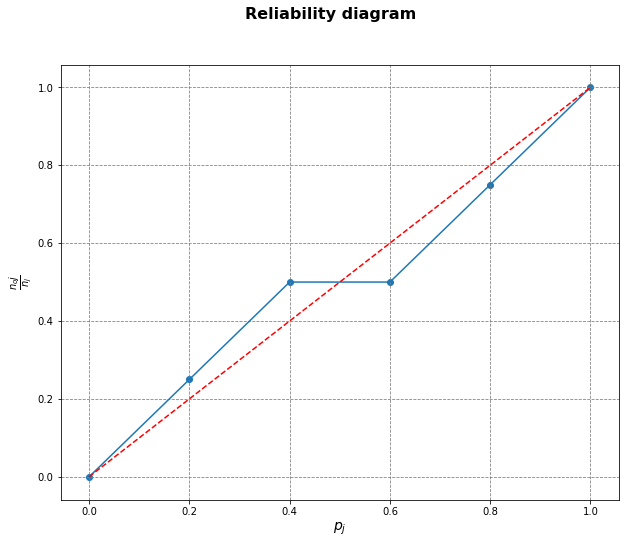

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('Reliability diagram', fontsize= plt_set.title_size, fontweight="bold")
ax.set_ylabel(r'$ \frac{n_oj}{n_j}$', fontsize = plt_set.label)
ax.set_xlabel('$p_j$', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.plot(pj, (noj/nj))
ax.scatter(pj, (noj/nj))
x = np.linspace(0,1,100)
ax.plot(x, x, "--r")

plt.show()



  - (c) find the reliability Brier skill score.
 $$
 B S S_{\text {reliability}}=\frac{\sum_{j=0}^{J}\left[\left(n_{j} \cdot p_{j}\right)-n_{o j}\right]^{2}}{\left(\sum_{k=1}^{N} o_{k}\right) \cdot\left(N-\sum_{k=1}^{N} o_{k}\right)}
 $$

In [34]:
k1 = np.sum(((nj * pj) - noj)**2)
k2 = (np.sum(ok)) * (N - np.sum(ok))

BSSR = k1/k2

print(f"Reliability Brier skill score {round(BSSR,8)}")


Reliability Brier skill score 0.0040404


 A23. For any one part of this exercise (Ex a to Ex
 d) of this problem, a 10-member ensemble forecast
 system forecasts probabilities that 24-h accumulated
 rainfall will exceed 5 mm. The observation flags (o)
 and forecast probabilities (p) are given in the table
 (in the next column) for a 30-day period. Calculate
 the hit rate and false-alarm rate for the full range
 of allowed probability thresholds, and plot the result as a ROC diagram. Also find the area under the
 ROC curve and find the ROC skill score
 $$
 \begin{array}{c|c|c|c|c|cc|c|c|c|c|c}\text { Day } & o & \text{Ex a:  } p(\%) & p(\%) & p(\%) & p(\%) & \text { Day } & o & \text{Ex a:  } p(\%) & p(\%) & p(\%) & p(\%) \\ \hline 1 & 1 & 50 & 10 & 100 & 0 & 16 & 0 & 60 & 30 & 20 & 40 \\ 2 & 0 & 20 & 0 & 0 & 10 & 17 & 1 & 70 & 60 & 60 & 50 \\ 3 & 1 & 20 & 30 & 90 & 20 & 18 & 1 & 90 & 70 & 60 & 60 \\ \hline 4 & 1 & 60 & 40 & 90 & 30 & 19 & 1 & 80 & 80 & 60 & 70 \\ \hline 5 & 0 & 50 & 30 & 0 & 40 & 20 & 0 & 70 & 70 & 30 & 80 \\ \hline 6 & 0 & 20 & 40 & 0 & 50 & 21 & 0 & 10 & 80 & 30 & 90 \\ \hline 7 & 0 & 30 & 50 & 10 & 60 & 22 & 0 & 10 & 90 & 30 & 100 \\ \hline 8 & 1 & 90 & 80 & 80 & 70 & 23 & 0 & 0 & 0 & 40 & 10 \\ \hline 9 & 0 & 40 & 70 & 10 & 80 & 24 & 0 & 0 & 10 & 40 & 20 \\ \hline 10 & 1 & 30 & 100 & 80 & 90 & 25 & 1 & 80 & 40 & 50 & 30 \\ \hline 11 & 1 & 100 & 100 & 70 & 100 & 26 & 0 & 0 & 30 & 40 & 40 \\ \hline 12 & 0 & 10 & 0 & 10 & 0 & 27 & 0 & 0 & 40 & 0 & 50 \\ \hline 13 & 0 & 0 & 0 & 20 & 10 & 28 & 1 & 100 & 70 & 50 & 60 \\ \hline 14 & 0 & 10 & 10 & 20 & 20 & 29 & 0 & 10 & 60 & 0 & 70 \\ \hline 15 & 1 & 80 & 40 & 70 & 30 & 30 & 1 & 90 & 10 & 50 & 0\end{array}
 $$

 $$
 \begin{array}{ll}a=\text { count of days with hits } & \left(o_{j}, f_{j}\right)=(1,1) \\ b=\text { count of days with false alarms }\left(o_{j} f_{j}\right)=(0,1) & . \\ c=\text { count of days with misses }\left(o_{j}, f_{j}\right)=(1,0) \\ d=\text { count of days: correct rejection }\left(o_{j}, f_{j}\right)=(0,0)\end{array}
 $$
 $$
 \\
 $$

In [36]:
import pandas as pd
table = {"Days": np.arange(1,31,1),
        "o": np.array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]),
        "p": np.array([50, 20, 20, 60, 50, 20, 30, 90, 40, 30, 100, 10, 0, 10, 80, 60, 70, 90, 80, 70, 10, 10, 0, 0, 80, 0, 0, 100, 10, 90])}
prect = np.arange(0,110,10)

zero = np.zeros_like(table['p'])

table['a'], table['b'], table['c'], table['d'] = [], [], [], []
for i in range(len(prect)):

        flag = np.where(table['p'] < prect[i], zero, 1 )
        table[prect[i]]= flag

        a = flag[table['o']==1]
        table['a'].append(np.sum(a))

        b = flag[table['o']==0]
        table['b'].append(np.sum(b))

        d = np.where(flag != table['o'], zero, -1)
        dd = (np.sum(d)+ np.sum(a))*-1
        table['d'].append(dd)

        c = np.where((table['o']==0) & (flag==1), zero, -1)
        table['c'].append((np.sum(a)+np.sum(c) + dd)*-1)


df = pd.DataFrame.from_dict(table, orient='index')
df = df.transpose()
print(df)

Days    o      p     a     b     c     d    0   10   20   30   40   50  \
0    1.0  1.0   50.0  13.0  17.0   0.0   0.0  1.0  1.0  1.0  1.0  1.0  1.0   
1    2.0  0.0   20.0  13.0  12.0   0.0   5.0  1.0  1.0  1.0  0.0  0.0  0.0   
2    3.0  1.0   20.0  13.0   7.0   0.0  10.0  1.0  1.0  1.0  0.0  0.0  0.0   
3    4.0  1.0   60.0  12.0   5.0   1.0  12.0  1.0  1.0  1.0  1.0  1.0  1.0   
4    5.0  0.0   50.0  11.0   4.0   2.0  13.0  1.0  1.0  1.0  1.0  1.0  1.0   
5    6.0  0.0   20.0  11.0   3.0   2.0  14.0  1.0  1.0  1.0  0.0  0.0  0.0   
6    7.0  0.0   30.0  10.0   2.0   3.0  15.0  1.0  1.0  1.0  1.0  0.0  0.0   
7    8.0  1.0   90.0   9.0   1.0   4.0  16.0  1.0  1.0  1.0  1.0  1.0  1.0   
8    9.0  0.0   40.0   8.0   0.0   5.0  17.0  1.0  1.0  1.0  1.0  1.0  0.0   
9   10.0  1.0   30.0   5.0   0.0   8.0  17.0  1.0  1.0  1.0  1.0  0.0  0.0   
10  11.0  1.0  100.0   2.0   0.0  11.0  17.0  1.0  1.0  1.0  1.0  1.0  1.0   
11  12.0  0.0   10.0   NaN   NaN   NaN   NaN  1.0  1.0  0.0  0.0  0.

 $$
 H=\frac{a}{a+c}
 $$

In [37]:

H = df.a / (df.a + df.c)
H = H[0:11]
print(f" Hit rate  {H}")


Hit rate  0     1.000000
1     1.000000
2     1.000000
3     0.923077
4     0.846154
5     0.846154
6     0.769231
7     0.692308
8     0.615385
9     0.384615
10    0.153846
dtype: float64


 $$
 F=\frac{b}{b+d}
 $$

In [38]:
F = df.b / (df.b + df.d)
F = F[0:11]
print(f"False-alarm rate   {F}")



False-alarm rate   0     1.000000
1     0.705882
2     0.411765
3     0.294118
4     0.235294
5     0.176471
6     0.117647
7     0.058824
8     0.000000
9     0.000000
10    0.000000
dtype: float64


 Plot the result as a ROC diagram

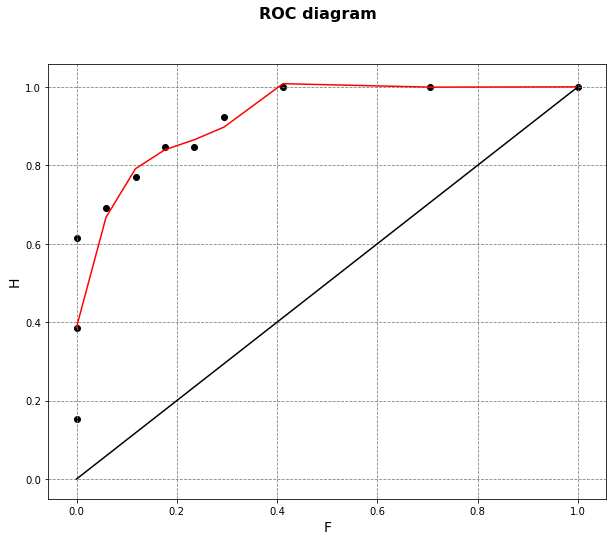

In [39]:

poly = np.polyfit(F,H,5)
poly_y = np.poly1d(poly)(F)

fig, ax = plt.subplots(1,1, figsize=(10,8))
fig.suptitle('ROC diagram', fontsize= plt_set.title_size, fontweight="bold")
ax.set_xlabel('F', fontsize = plt_set.label)
ax.set_ylabel('H', fontsize = plt_set.label)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.plot(F, poly_y, "r")
ax.scatter(F, H, color = 'k')
x = np.linspace(0,1,100)
ax.plot(x, x, color = "k")

plt.show()


 Find the area under the ROC curve and find the ROC skill score.
 $$
 \\
 $$
 $$
 S S_{R O C}=(2 \cdot A)-1
 $$

In [40]:
from scipy.integrate import simps

# Compute the area using the composite trapezoidal rule.
area = np.trapz(H[::-1], F[::-1])
area = round(area,3)
SSR = (2*area) - 1
SSR = round(SSR,3)
print(f"Area under the ROC curve: {area} and ROC skill score: {SSR}")



Area under the ROC curve: 0.932 and ROC skill score: 0.864
